In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Analyzing paired data

Say we measure the activity of a bunch of cells before and after learning. Suppose that $$ \text{post-learning activity} = \text{baseline activity} + \text{effect of learning} + \text{noise}. $$ If we can measure the activity of the same cells before and after learning, we can use paired statistical tests to remove baseline variability from the equation. This allows us to estimate the mean effect of learning more precisely, leading to smaller p-values. When the amount of baseline variability is large, not using paired statistical tests can cause us to miss out on significant results, as in the example below.

In [2]:
baseline_variability = 2
baseline_mean = 0
baseline = np.random.normal(baseline_mean, baseline_variability, size=50)

effect_variability = 1
effect_mean = 1
learning_effect = np.random.normal(effect_mean, effect_variability, size=50)

post_learning = baseline + learning_effect

## Pre- and post-learning measurements

The activity increases after learning, but there's a lot of variability.

Text(0.5, 0, 'Activity')

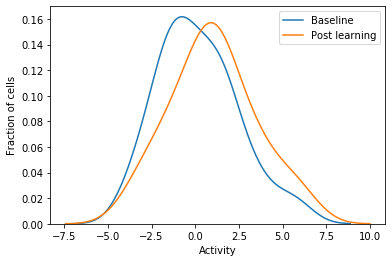

In [3]:
sns.kdeplot(baseline, label='Baseline')
sns.kdeplot(post_learning, label='Post learning')
plt.ylabel('Fraction of cells')
plt.xlabel('Activity')

## Estimated effect of learning

Text(0, 0.5, 'Fraction of cells')

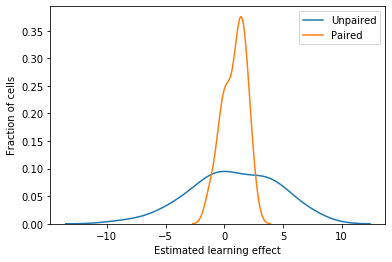

In [4]:
# In an unpaired analysis, the post-learning measurements aren't related to any particular baseline
# We can approximate this by scrambling the post-learning measurements when we estimate the effect
sns.kdeplot(np.random.permutation(post_learning) - baseline, label='Unpaired')

# In a paired analysis, the effect of learning is estimated based on the difference between the
# pre and post-learning measurements for each cell
sns.kdeplot(post_learning - baseline, label='Paired')

plt.xlabel('Estimated learning effect')
plt.ylabel('Fraction of cells')

Notice that if we disregard pairing by scrambling the post-learning measurements, the effect of learning looks much more variable.

# Unpaired analysis

In [5]:
# Estimate effect based on difference in means
estimated_effect_mean = np.mean(post_learning) - np.mean(baseline)
# Estimate variability based on weighted average of baseline and post-learning SD
estimated_effect_variability = np.sqrt(
    (
        (len(baseline) - 1) * baseline.std() ** 2 
        + (len(post_learning) - 1) * post_learning.std()**2
    ) / (len(baseline) + len(post_learning) - 2)
)

print(f'Estimated effect: {estimated_effect_mean:.3f} +/- {estimated_effect_variability:.3f}')

Estimated effect: 0.870 +/- 2.342


Notice that the variability (SD) of the effect is roughly the SD of the baseline measurement (`baseline_variability`). This is much larger than the actual variability (SD) of the effect (`effect_variability` in cell 2).

In [6]:
stats.ttest_ind(post_learning, baseline)

Ttest_indResult(statistic=1.8382118367434157, pvalue=0.06906026400423934)

If we run a t-test assuming that the samples are unpaired, we get a non-significant p-value because we have overestimated the variability of the effect.

# Paired analysis

In [7]:
estimated_effect_mean = np.mean(post_learning - baseline)
estimated_effect_variability = np.std(post_learning - baseline)

print(f'Estimated effect: {estimated_effect_mean:.3f} +/- {estimated_effect_variability:.3f}')

Estimated effect: 0.870 +/- 0.983


In [8]:
stats.ttest_rel(post_learning, baseline)

Ttest_relResult(statistic=6.194958420669926, pvalue=1.1708820432476288e-07)

# Analyzing unpaired data

Applying paired analysis methods to unpaired data won't get us anywhere.

In [9]:
baseline = np.random.normal(0, baseline_variability, size=50)
post_learning = np.random.normal(0 + effect_mean, baseline_variability, size=50)

Text(0.5, 0, 'Activity')

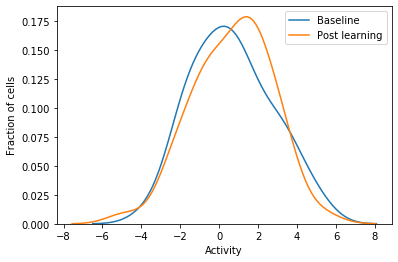

In [10]:
sns.kdeplot(baseline, label='Baseline')
sns.kdeplot(post_learning, label='Post learning')
plt.ylabel('Fraction of cells')
plt.xlabel('Activity')

## Estimated effect

Text(0, 0.5, 'Fraction of cells')

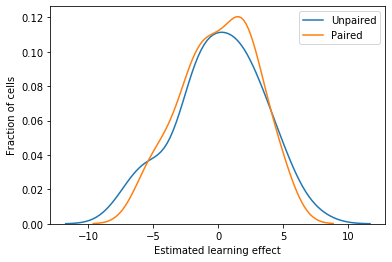

In [11]:
# In an unpaired analysis, the post-learning measurements aren't related to any particular baseline
# We can approximate this by scrambling the post-learning measurements when we estimate the effect
sns.kdeplot(np.random.permutation(post_learning) - baseline, label='Unpaired')

# In a paired analysis, the effect of learning is estimated based on the difference between the
# pre and post-learning measurements for each cell
sns.kdeplot(post_learning - baseline, label='Paired')

plt.xlabel('Estimated learning effect')
plt.ylabel('Fraction of cells')

Since the samples were unpaired to begin with, it doesn't matter whether we scramble the pairings.

## t-tests

In [12]:
stats.ttest_ind(post_learning, baseline)

Ttest_indResult(statistic=0.11466578107696491, pvalue=0.9089446438875027)

In [13]:
stats.ttest_rel(post_learning, baseline)

Ttest_relResult(statistic=0.11633822554122017, pvalue=0.9078600003832539)

Using a paired test doesn't help us here because the samples aren't paired. In fact, using a paired test on unpaired samples can actually hurt you because paired tests consider the sample size to be smaller.